In [57]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt #
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
%matplotlib inline 

#filename="Nc_Files/Wuhu_WACCMX_files/Wuhu_WACCMX_run_Feb_day1.ncdf"
filename="Nc_Files/Wuhu_WACCMX_files/Wuhu_WACCMX_run_Feb_day1-2.ncdf"
Metal = 'Fe'
ds = xr.open_dataset(filename)
#ds

In [58]:
time = ds.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=24, freq="1H", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times3 = ds["time"].dt.strftime("%Y%m%d")

#times
#times2
#times3

In [59]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

dst = ds.transpose("lev", ...)

Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']
temp = dst.variables['T']
elect = dst.variables['e']

geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp
#lat

In [60]:
Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
edens = ( elect * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

#Mtdens2 = Mtdens / 1000 # convert to 10^3 cm-3
#Mptdens2 = Mptdens / 1000 # convert to 10^3 cm-3

In [61]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-6

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)

#print(lev[low_ylim_idx])
#print(lev[high_ylim_idx])

y_lims = [lev[low_ylim_idx], lev[high_ylim_idx]]


In [62]:
timeticks = np.linspace( (0) , (24) ,25, dtype=int)
timeticks48 = np.linspace( (0) , (48) ,49, dtype=int)
timeticks48

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [65]:
Mp_vert = Mptdens.mean(('lat', 'lon')) / 1000
#Mp_vert #lev: 145  time: 26

Mp_vert_plot = Mp_vert[:,0:25] #lev: 145 time: 25
times_plot = times2[0:25]

Mp_vert_plot48 = Mp_vert[:,0:49] #lev: 145 time: 25
times_plot48 = times2[0:49]

#times_plot48 # time:49

/tmp/ipykernel_1980535/3772853990.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::8], pad=0.14)


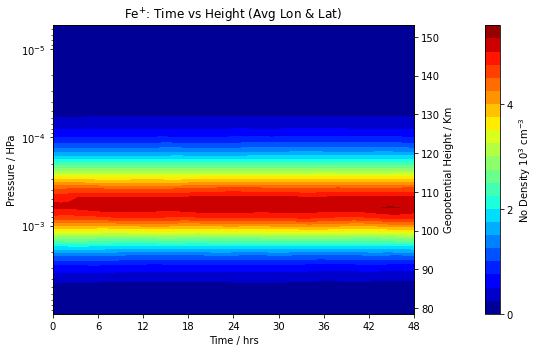

In [72]:
#__Mp_vert__
ticks2 = np.linspace(0, 5.5, num=23) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times_plot48, lev, Mp_vert_plot48, 
                levels=ticks2, 
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Time / hrs')
#ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
#ax.set_xticklabels(np.linspace(1,29,10, dtype=int))
ax.set_xticks(np.linspace(0,48,9, dtype=int)) 
ax.set_xticklabels(timeticks48[::6])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::8], pad=0.14)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname=str(Metal)+'p: Time vs Height (Avg Lon & Lat)_48h'+'.png'
plt.savefig('./Figures/Wuhu_run/'+str(figname), dpi = 300)

In [ ]:
#-------------------------------------------------------------------------------------
#___Not edited the below section_____
#-------------------------------------------------------------------------------------

In [62]:
Mp_latlev = Mptdens.mean(('time', 'lon')) / 1000

/tmp/ipykernel_1651459/4240998820.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)


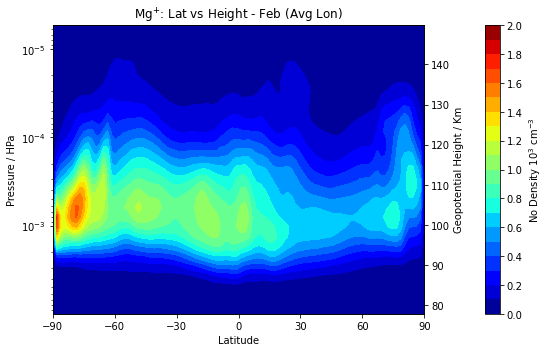

In [63]:
#__Mp_latlev__
#ticks2 = np.linspace(0, 2.5, num=26) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, Mp_latlev, 
                levels=ticks2,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Lat vs Height - Feb (Avg Lon)')
plt.tight_layout()

figname=str(Metal)+'p: Lat vs Height - Feb (Avg Lon)'+'.png'
#plt.savefig('./Figures/Wuhu_run/'+str(figname), dpi = 300)

In [64]:
Mp_lonlev = Mptdens.mean(('time', 'lat')) / 1000

/tmp/ipykernel_1651459/3071590281.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)


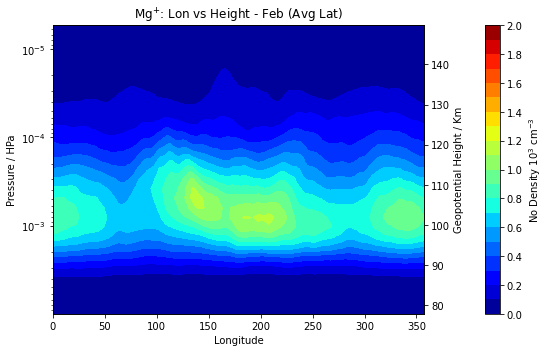

In [65]:
#__Mp_lonlev__
#ticks2 = np.linspace(0, 1.6, num=17) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lon, lev, Mp_lonlev, 
                levels=ticks2,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Longitude')
#ax.set_xticks(np.linspace(0,144,13,dtype=int))
#ax.set_xticklabels(np.linspace(1,144,12, dtype=int))

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Lon vs Height - Feb (Avg Lat)')
plt.tight_layout()

figname=str(Metal)+'p: Lon vs Height - Feb (Avg Lat)'+'.png'
#plt.savefig('./Figures/Wuhu_run/'+str(figname), dpi = 300)

In [ ]:
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------

In [77]:
e_vert = edens.mean(('lat', 'lon')) / 1e3

e_vert_plot = e_vert[:,0:25] #lev: 145 time: 25

e_vert_plot48 = e_vert[:,0:49] #lev: 145 time: 25
times_plot48 = times2[0:49]
#e_vert #lev: 145 time: 26

/tmp/ipykernel_1980535/1266584524.py:28: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.14)


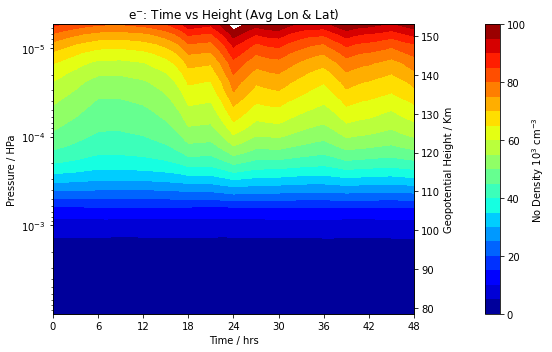

In [80]:
#__e_vert__
#ticks2 = np.linspace(0, 5.5, num=23) #cm-3
ticks2 = np.linspace(0, 100, num=21) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times_plot48, lev, e_vert_plot48, 
                levels=ticks2, 
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Time / hrs')

#24h
#ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
#ax.set_xticklabels(timeticks[::2])
#48h
ax.set_xticks(np.linspace(0,48,9, dtype=int)) 
ax.set_xticklabels(timeticks48[::6])


ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.14)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title('e$^{-}$: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname='e: Time vs Height (Avg Lon & Lat)_48h'+'.png'
plt.savefig('./Figures/Wuhu_run/'+str(figname), dpi = 300)